In [37]:
import pandas as pd

In [39]:
df = pd.read_csv('housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [40]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
# Mostrar os dados faltantes
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [43]:
df2 = df.dropna()
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

---

## Gráfico de dispersão a partir de coordenadas geográficas

In [44]:
import matplotlib.pyplot as plt

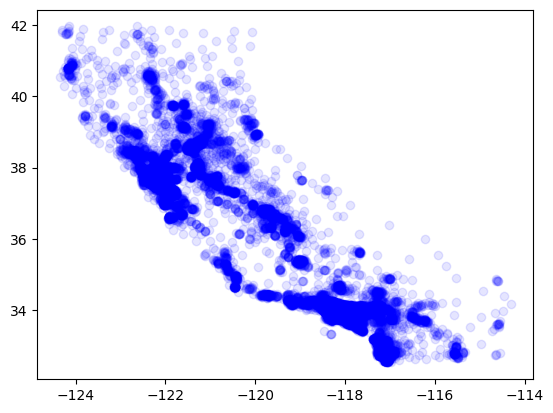

In [45]:
plt.plot(df['longitude'], df['latitude'], 'bo', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

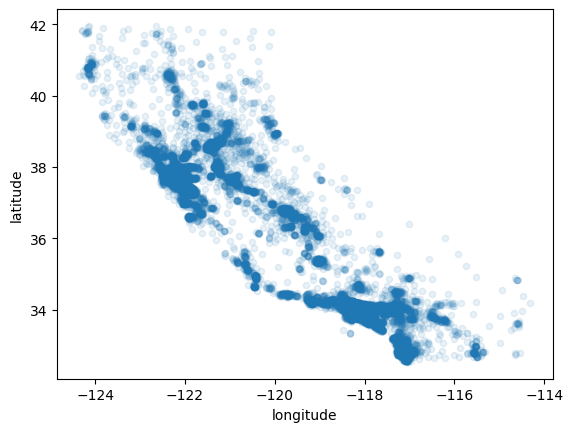

In [46]:
df.plot(x='longitude', y='latitude', kind='scatter', alpha=0.1)

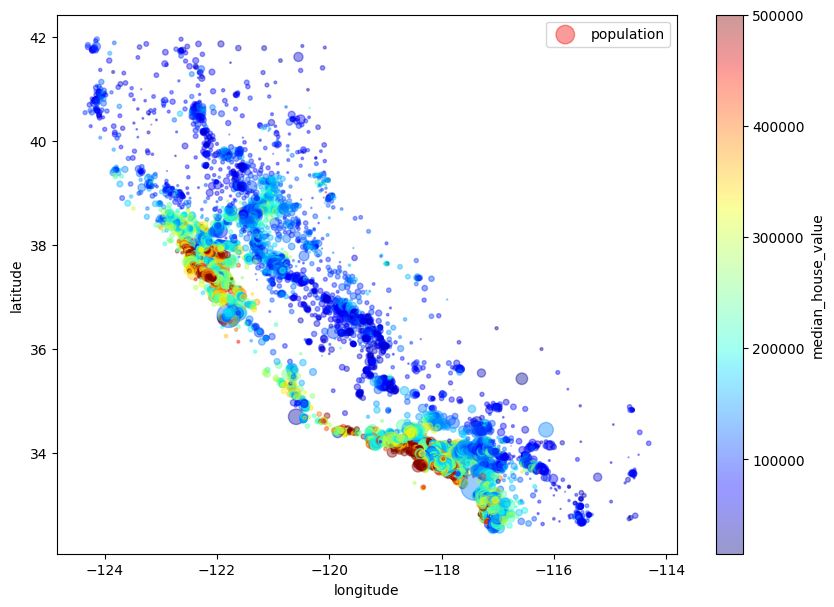

In [47]:
df.plot(x='longitude', y='latitude', kind='scatter', alpha=0.4,
        s = df['population']/100, label='population', figsize=(10,7),
        c= 'median_house_value', cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [48]:
import folium

In [49]:
lat = df['latitude'].mean()
lon = df['longitude'].mean()

In [50]:
loc = (df['latitude'].mean(),df['longitude'].mean())

mapa = folium.Map(location=loc, zoom_start=6)
mapa

In [51]:
folium.Marker((lat,lon), popup='Rooney').add_to(mapa)
mapa


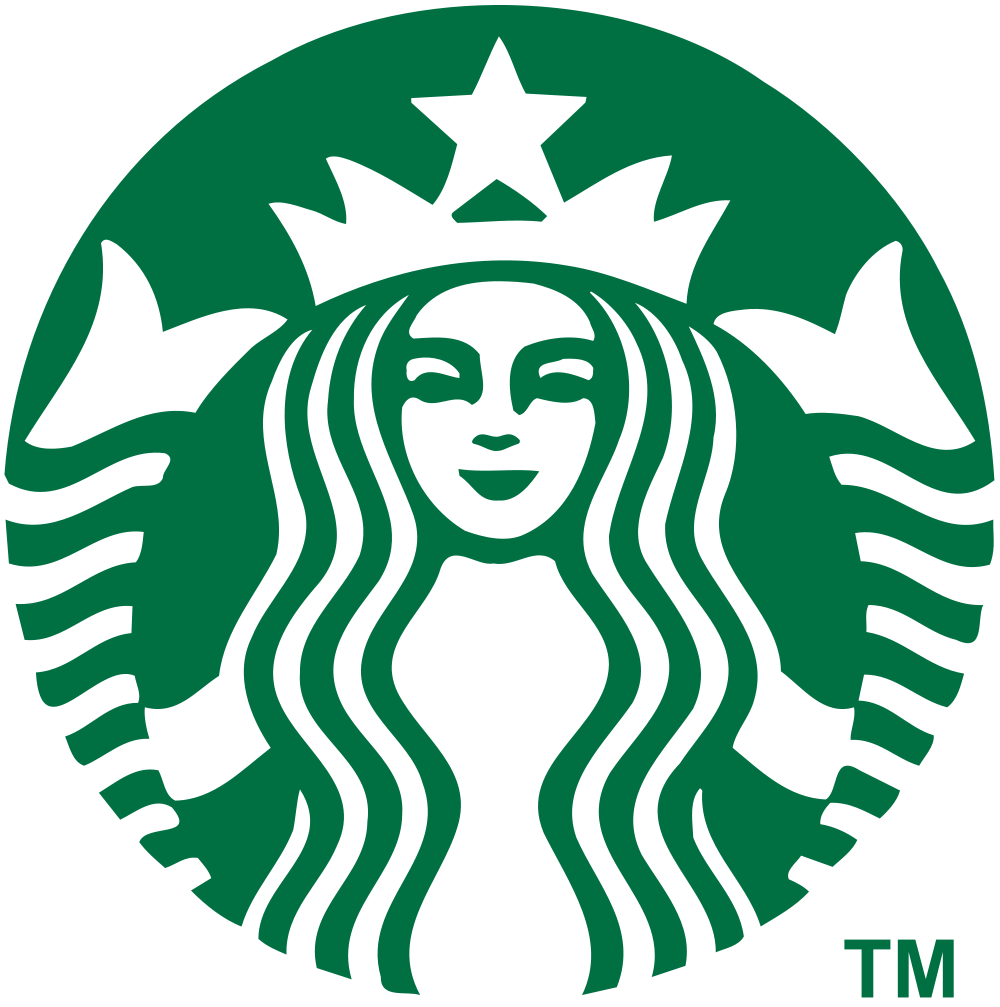

In [52]:
# Criar um ícone personalizado
icon = folium.CustomIcon(icon_image="Starbucks-logo.png", icon_size=(30, 30))

loc = (df['latitude'].mean(),df['longitude'].mean())

mapa = folium.Map(location=loc, zoom_start=6)
folium.Marker((lat,lon), popup='Rooney', icon=icon).add_to(mapa)
mapa

In [53]:
mapa = folium.Map(location=loc, zoom_start=6)
for lat,lon in zip(df['latitude'][0:100], df['longitude'][0:100]):
  folium.Marker((lat,lon)).add_to(mapa)
mapa

In [61]:
from folium.plugins import HeatMap

data = df[['latitude', 'longitude']]

mapa = folium.Map(location=loc, zoom_start=6)
HeatMap(data, radius= 13).add_to(mapa)
mapa

In [66]:
import folium
from folium.plugins import MarkerCluster

# Criar um objeto Map
mapa = folium.Map(location=loc, zoom_start=6)

# Criar um objeto MarkerCluster e adicioná-lo ao mapa
marker_cluster = MarkerCluster().add_to(mapa)

# Agora você pode adicionar marcadores ao cluster
for lat, lon in zip(df['latitude'], df['longitude']):
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

# Mostrar o mapa
mapa

In [67]:
# Salva o mapa
mapa.save("mapa.html")

---

In [69]:
from geopy.geocoders import Nominatim

In [70]:
geolocator = Nominatim(user_agent='CDIA')

In [81]:
location = geolocator.geocode('Rua Monte Alegre, 984')
nome = location[0]
loc = location[1]

mapa = folium.Map(location=loc, zoom_start=20)
folium.Marker(loc, popup=nome).add_to(mapa)
mapa

In [ ]:
!pip install pykml

In [83]:
from pykml import parser
import pandas as pd

# Abra o arquivo KML e analise-o
with open('meu_arquivo.kml', 'r') as f:
    kml_file = parser.parse(f)

# Obtenha a lista de Placemarks
placemarks = list(kml_file.getroot().Document.Placemark)

# Crie um DataFrame a partir dos Placemarks
df = pd.DataFrame([{
    'name': p.name.text,
    'longitude': float(p.LookAt.longitude.text),
    'latitude': float(p.LookAt.latitude.text),
} for p in placemarks])

print(df)

                name  longitude   latitude
0            Habib's -46.700073 -23.541091
1  Habib's - Augusta -46.661446 -23.559046
2            Habib's -46.700073 -23.541091


---

In [84]:
import pandas as pd

df = pd.read_csv('logradouros.csv')
df

MAPINFO_ID                                     Rua  FromLeft  ToLeft  \
0                1  R DESEM FREDERICO ROBERTO DE A.MARQUES       135     307   
1                2         R DESEM OCTAVIO EGYDIO ROGGIERO         0       0   
2                3                 R DESEM ISNARD DOS REIS       573     891   
3                4   R DESEM FAUSTO WHITAKER MACHADO ALVIM         0       0   
4                5                 R DESEM ISNARD DOS REIS       449     571   
...            ...                                     ...       ...     ...   
177306      177307                                     NaN         0       0   
177307      177308                             AV CIRCULAR         0       0   
177308      177309                                     NaN         0       0   
177309      177310                        R ANGELO ALOISIO         0       0   
177310      177311                          RUA DA ALEGRIA         0       0   

        FromRight  ToRight tipo titulo preposicao  codlog  codseg codlog5  \
0             134      306    R  DESEM        NaN  433918     NaN   43391   
1               0        0    R  DESEM        NaN  433888     NaN   43388   
2             550      664    R  DESEM        NaN  370290     NaN   37029   
3               0        0    R  DESEM        NaN  404624     NaN   40462   
4             504      548    R  DESEM        NaN  370290     NaN   37029   
...           ...      ...  ...    ...        ...     ...     ...     ...   
177306          0        0  NaN    NaN        NaN     NaN     NaN     NaN   
177307          0        0  NaN    NaN         AV     NaN     NaN   98736   
177308          0        0  NaN    NaN        NaN     NaN     NaN     NaN   
177309          0        0    R    NaN        NaN  300578     NaN   30057   
177310          0        0    R    NaN        NaN     NaN     NaN     NaN   

        sentido classificacao  
0           500         Local  
1           500         Local  
2           500         Local  
3           500         Local  
4           500         Local  
...         ...           ...  
177306        0           NaN  
177307        0           NaN  
177308        0           NaN  
177309        0           NaN  
177310        0           NaN  

[177311 rows x 14 columns]

In [87]:
df['Rua'].dropna()

0         R DESEM FREDERICO ROBERTO DE A.MARQUES
1                R DESEM OCTAVIO EGYDIO ROGGIERO
2                        R DESEM ISNARD DOS REIS
3          R DESEM FAUSTO WHITAKER MACHADO ALVIM
4                        R DESEM ISNARD DOS REIS
                           ...                  
177304                            EST ARICANDUVA
177305                            TV PREVIDENCIA
177307                               AV CIRCULAR
177309                          R ANGELO ALOISIO
177310                            RUA DA ALEGRIA
Name: Rua, Length: 177309, dtype: object

In [90]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='CDIA')

locations = []
for nome in df['Rua'].dropna():
  location = geolocator.geocode(nome)
  try:
    #nome = location[0]
    loc = location[1]
    locations.append(loc)
  except:
    pass

#mapa = folium.Map(location=loc, zoom_start=20)
#folium.Marker(loc, popup=nome).add_to(mapa)
#mapa

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=R+DESEM+FERNANDO+DE+ALBUQUERQUE+PRADO&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [91]:
locations

[(-4.4315288, -49.1065109),
 (-23.5085006, -46.3687235),
 (-22.2513075, -47.3639716),
 (-23.5085006, -46.3687235),
 (-23.5009961, -46.3691145),
 (-23.5009961, -46.3691145),
 (-23.5064864, -46.3696852),
 (-23.5076231, -46.3715538),
 (-22.2513075, -47.3639716),
 (-23.4990524, -46.3708978),
 (-23.5064864, -46.3696852),
 (-23.4990524, -46.3708978),
 (-23.4968347, -46.3705231),
 (-23.5076231, -46.3715538),
 (-23.4990524, -46.3708978),
 (-23.4998349, -46.3697552)]

In [92]:
import folium
from folium.plugins import MarkerCluster

# Criar um objeto Map
mapa = folium.Map(location=locations[0], zoom_start=10)

# Criar um objeto MarkerCluster e adicioná-lo ao mapa
marker_cluster = MarkerCluster().add_to(mapa)

# Agora você pode adicionar marcadores ao cluster
for loc in locations:
    folium.Marker(location=loc).add_to(marker_cluster)

# Mostrar o mapa
mapa